### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Globals

In [3]:
data_filepath = '../../original_data/'
density_report_filepath = data_filepath + 'DensityReports.xlsx'
historical_incidents_filepath = data_filepath + 'HistoricalIncidents.xlsx'
product_attributes_filepath = data_filepath + 'ProductAttributes.xlsx'
supplier_scorecard_filepath = data_filepath + 'SupplierScorecard.xlsx'

### Load Data

In [4]:
density_report = pd.read_excel(density_report_filepath)
# historical_incidents = pd.read_excel(historical_incidents_filepath)
# product_attributes = pd.read_excel(product_attributes_filepath)
# supplier_scorecard = pd.read_excel(supplier_scorecard_filepath)

## Initial Inspection

In [5]:
density_report.head()

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
0,RPT0000001,PRD07271,2024-03-04,SupplierA,Pants,Polyester,0.35,29.0,Method2,LayoutC,Good
1,RPT0000002,PRD00861,2024-05-27,SupplierC,T-Shirt,Denim,0.21,20.0,Method2,LayoutB,Good
2,RPT0000003,PRD05391,2023-11-18,SupplierA,Shirt,Cotton,0.20,31.0,Method1,LayoutA,Good
3,RPT0000004,PRD05192,2024-06-13,SupplierA,Coat,Cotton,1.30,5.0,Method1,LayoutD,Good
4,RPT0000005,PRD05735,2023-07-18,SupplierA,Coat,Polyester,1.11,9.0,Method2,LayoutD,Good


In [6]:
density_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ReportID                500000 non-null  object        
 1   ProductReference        500000 non-null  object        
 2   DateOfReport            500000 non-null  datetime64[ns]
 3   SupplierName            500000 non-null  object        
 4   GarmentType             500000 non-null  object        
 5   Material                500000 non-null  object        
 6   Weight                  500000 non-null  float64       
 7   ProposedUnitsPerCarton  500000 non-null  float64       
 8   ProposedFoldingMethod   497486 non-null  object        
 9   ProposedLayout          500000 non-null  object        
 10  PackagingQuality        500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 42.0+ MB


In [7]:
density_report.describe(include='all')

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
count,500000,500000,500000,500000,500000,500000,500000.000000,500000.000000,497486,500000,500000
unique,500000,15429,NaN,14,12,6,NaN,NaN,6,9,5
top,RPT0000001,PRD06,NaN,SupplierA,Shirt,Cotton,NaN,NaN,Method2,LayoutB,Good
freq,1,793,NaN,138607,101763,197020,NaN,NaN,218201,180359,397338
mean,NaN,NaN,2023-09-30 15:58:47.712000768,NaN,NaN,NaN,0.461021,99.981055,NaN,NaN,NaN
min,NaN,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,0.080000,-3.000000,NaN,NaN,NaN
25%,NaN,NaN,2023-05-17 00:00:00,NaN,NaN,NaN,0.210000,16.000000,NaN,NaN,NaN
50%,NaN,NaN,2023-09-30 00:00:00,NaN,NaN,NaN,0.330000,25.000000,NaN,NaN,NaN
75%,NaN,NaN,2024-02-14 00:00:00,NaN,NaN,NaN,0.620000,32.000000,NaN,NaN,NaN
max,NaN,NaN,2024-06-30 00:00:00,NaN,NaN,NaN,2.320000,9999.000000,NaN,NaN,NaN


In [8]:
density_report.dtypes

ReportID                          object
ProductReference                  object
DateOfReport              datetime64[ns]
SupplierName                      object
GarmentType                       object
Material                          object
Weight                           float64
ProposedUnitsPerCarton           float64
ProposedFoldingMethod             object
ProposedLayout                    object
PackagingQuality                  object
dtype: object

In [9]:
density_report.isnull().sum()

ReportID                     0
ProductReference             0
DateOfReport                 0
SupplierName                 0
GarmentType                  0
Material                     0
Weight                       0
ProposedUnitsPerCarton       0
ProposedFoldingMethod     2514
ProposedLayout               0
PackagingQuality             0
dtype: int64

In [10]:
density_report.duplicated().sum()

0

## Baisc Transformations

In [16]:
unique_packaging_quality = density_report['PackagingQuality'].unique()
print(unique_packaging_quality)

['Good' 'Bad' 'GOOD' 'Uncertain' 'bad']


In [17]:
density_report['PackagingQuality'] = density_report['PackagingQuality'].str.upper()
unique_packaging_quality = density_report['PackagingQuality'].unique()
print(unique_packaging_quality)

['GOOD' 'BAD' 'UNCERTAIN']


In [43]:
unique_supplier = density_report['SupplierName'].unique()
print(unique_supplier)

['SupplierA' 'SupplierC' 'SupplierD' 'SupplierB' 'supplierA' 'SupplierF'
 'SupplierE' 'supplierh' 'SupplierH' 'SuppB' 'SupplierG' 'SupllierC'
 'SPLF' 'SuplA']


In [19]:
# Define the mappings
supplier_mappings = {
    'SupplierA': 'A',
    'supplierA': 'A',
    'SuplA': 'A',
    'SupplierB': 'B',
    'SuppB': 'B',
    'SupplierC': 'C',
    'SupllierC': 'C',
    'SupplierD': 'D',
    'SupplierE': 'E',
    'SupplierF': 'F',
    'SPLF': 'F',
    'SupplierG': 'G',
    'supplierh': 'H',
    'SupplierH': 'H'
}
# Apply the mapping to standardize SupplierName
density_report['SupplierName'] = density_report['SupplierName'].map(supplier_mappings).fillna(density_report['SupplierName'])

unique_supplier = density_report['SupplierName'].unique()
print(unique_supplier)

['A' 'C' 'D' 'B' 'F' 'E' 'H' 'G']


## Univariate Analysis

<Axes: ylabel='SupplierName'>

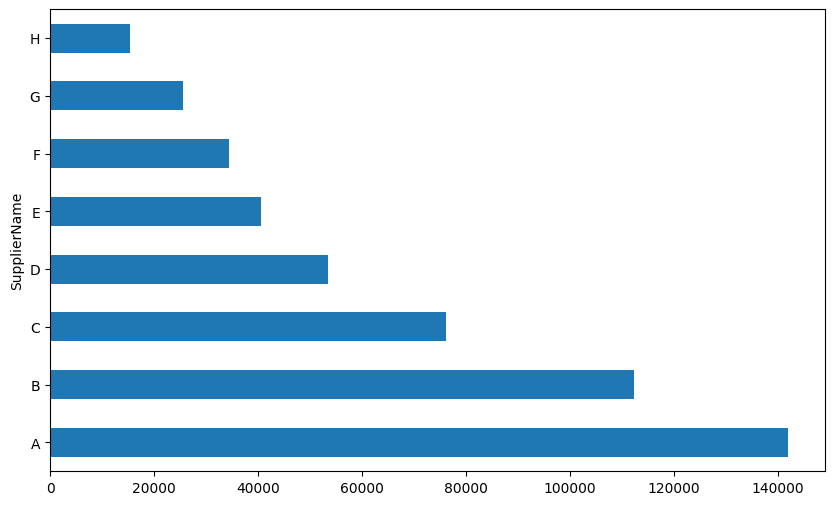

In [20]:
density_report["SupplierName"].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='GarmentType'>

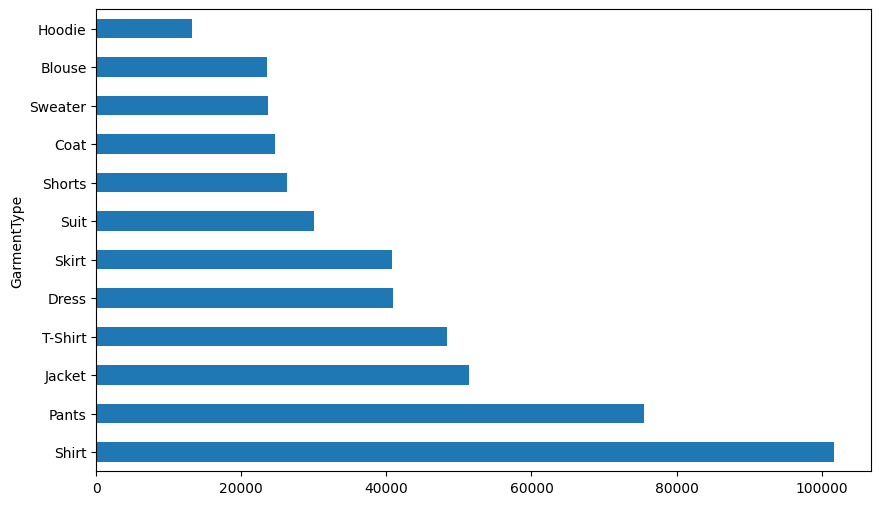

In [12]:
density_report["GarmentType"].value_counts().plot(kind='barh', figsize=(10, 6))

<Axes: ylabel='Material'>

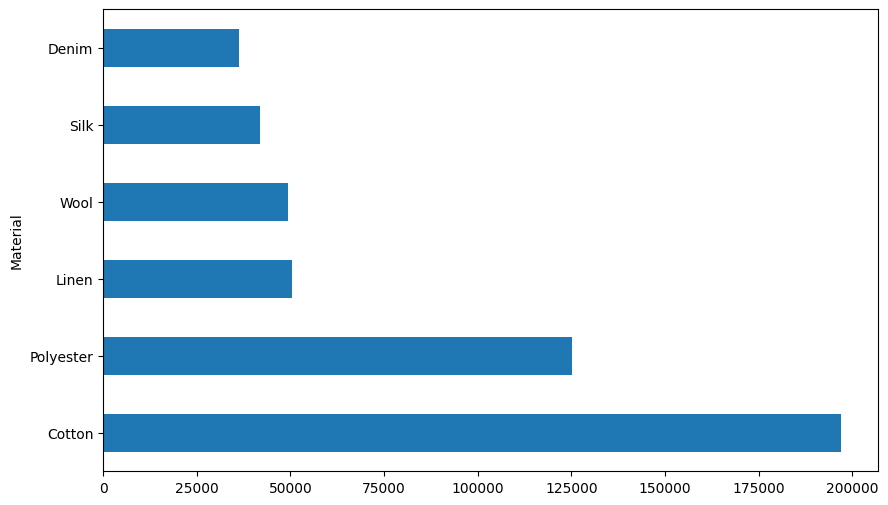

In [13]:
density_report["Material"].value_counts().plot(kind='barh', figsize=(10, 6))

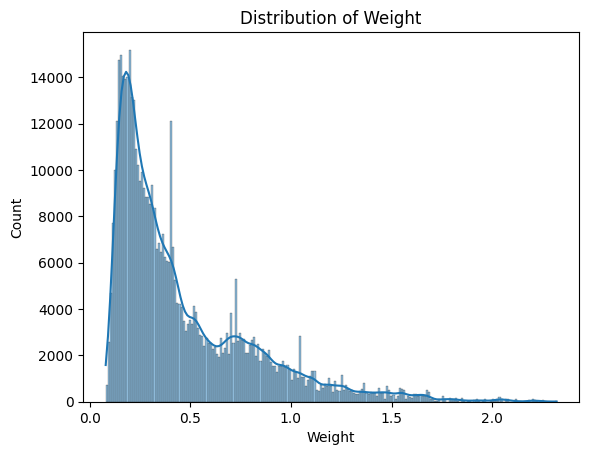

In [14]:
sns.histplot(density_report['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.show()

<Axes: ylabel='PackagingQuality'>

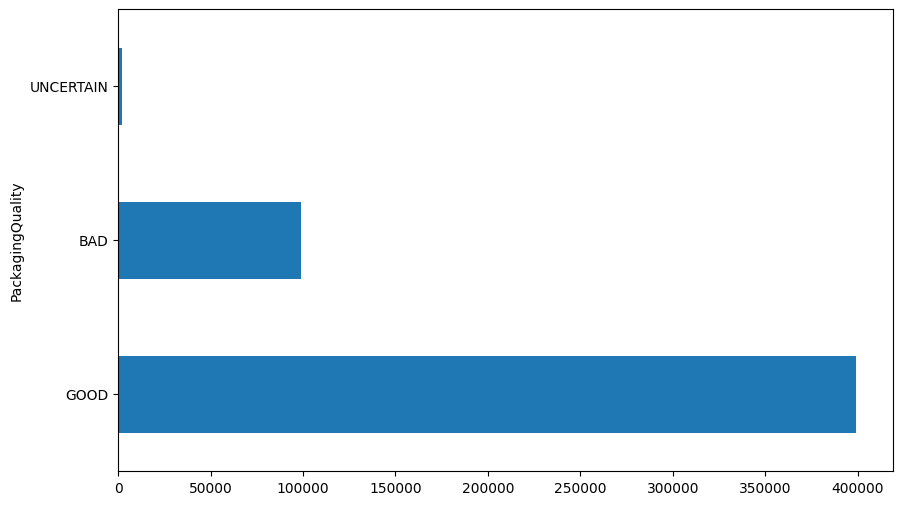

In [22]:
density_report["PackagingQuality"].value_counts().plot(kind='barh', figsize=(10, 6))

## Values Across Time

<Axes: xlabel='Month'>

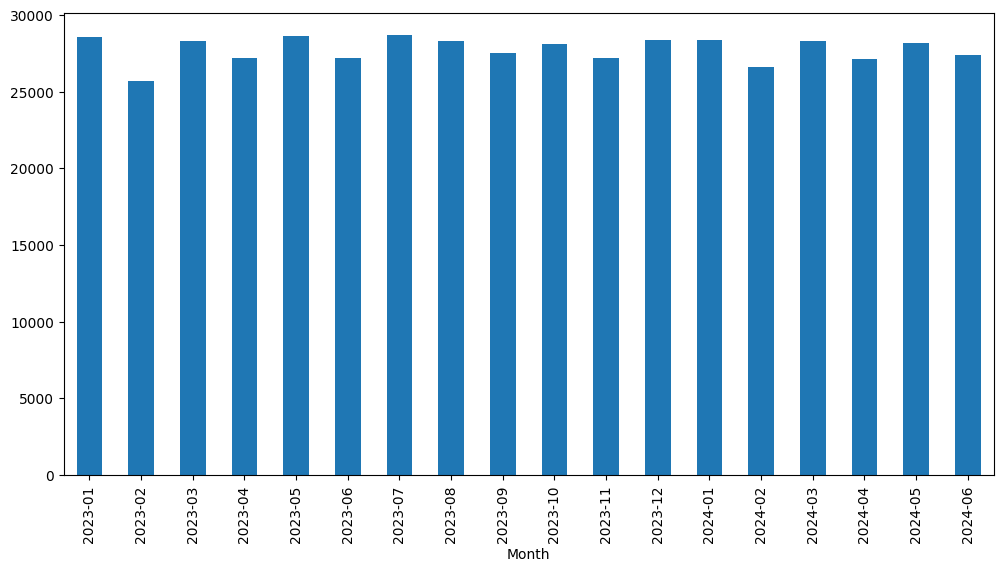

In [21]:
density_report['Month'] = density_report['DateOfReport'].dt.to_period('M')
monthly_counts = density_report.groupby('Month').size()
monthly_counts.plot(kind='bar', figsize=(12, 6))

##### Monthly Packaging Quality Distribution

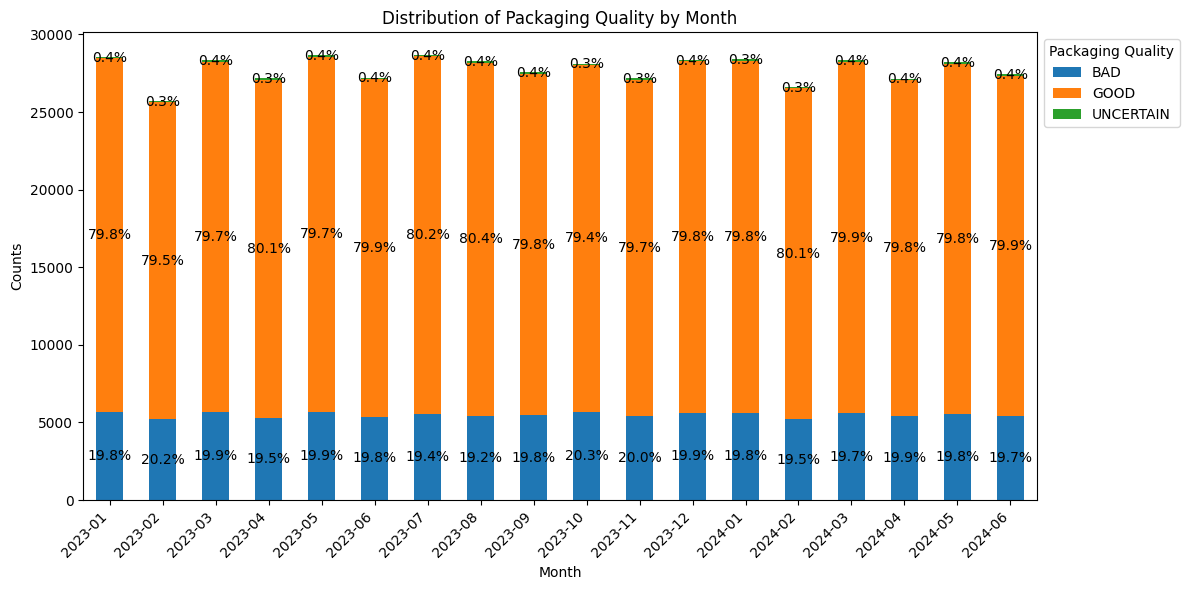

In [33]:
# Group by Month and Packaging Quality, then calculate counts
packaging_quality_by_month = density_report.groupby(['Month', 'PackagingQuality']).size().unstack(fill_value=0)

# Plot the distribution
ax = packaging_quality_by_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Packaging Quality by Month')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, month in enumerate(packaging_quality_by_month.index):
    total = packaging_quality_by_month.loc[month].sum()
    bottom = 0
    for quality in packaging_quality_by_month.columns:
        value = packaging_quality_by_month.loc[month, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

##### Monthly Gartment Type Distribution

In [36]:
unique_garment_type = density_report['GarmentType'].unique()
print(unique_garment_type)

['Pants' 'T-Shirt' 'Shirt' 'Coat' 'Dress' 'Blouse' 'Suit' 'Hoodie' 'Skirt'
 'Jacket' 'Shorts' 'Sweater']


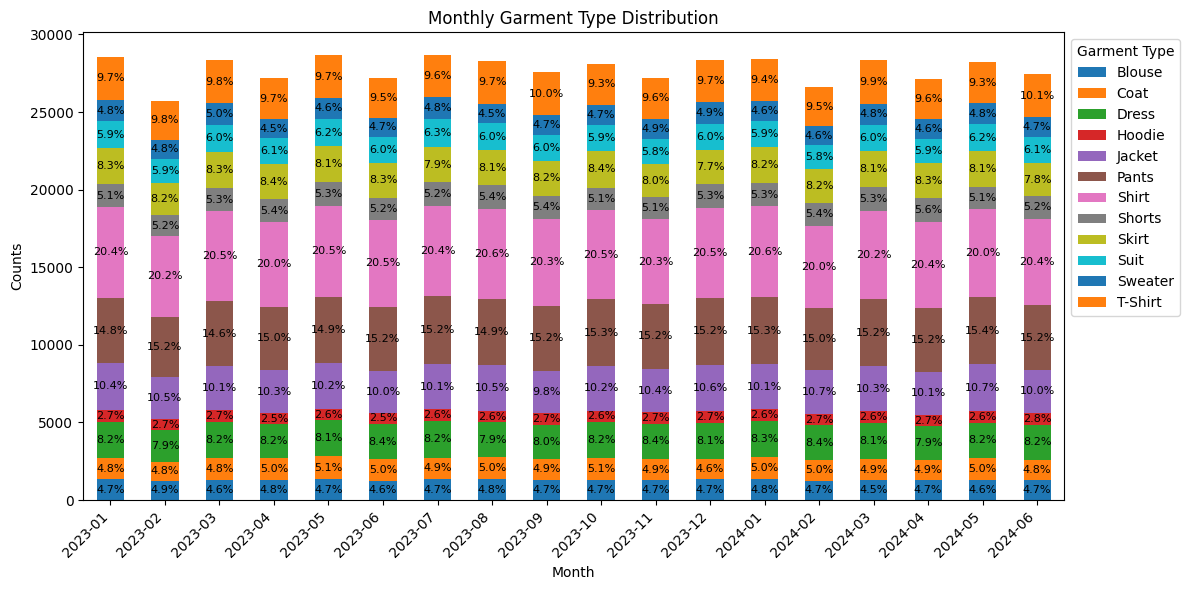

In [ ]:
# Group by Month and GarmentType, then calculate counts
monthly_garment_type_distribution = density_report.groupby(['Month', 'GarmentType']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_garment_type_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Garment Type Distribution')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Garment Type', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, month in enumerate(monthly_garment_type_distribution.index):
    total = monthly_garment_type_distribution.loc[month].sum()
    bottom = 0
    for garment_type in monthly_garment_type_distribution.columns:
        value = monthly_garment_type_distribution.loc[month, garment_type]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8)
        bottom += value

plt.show()

##### Monthly Material Distribution

In [38]:
unique_material = density_report['Material'].unique()
print(unique_material)

['Polyester' 'Denim' 'Cotton' 'Linen' 'Wool' 'Silk']


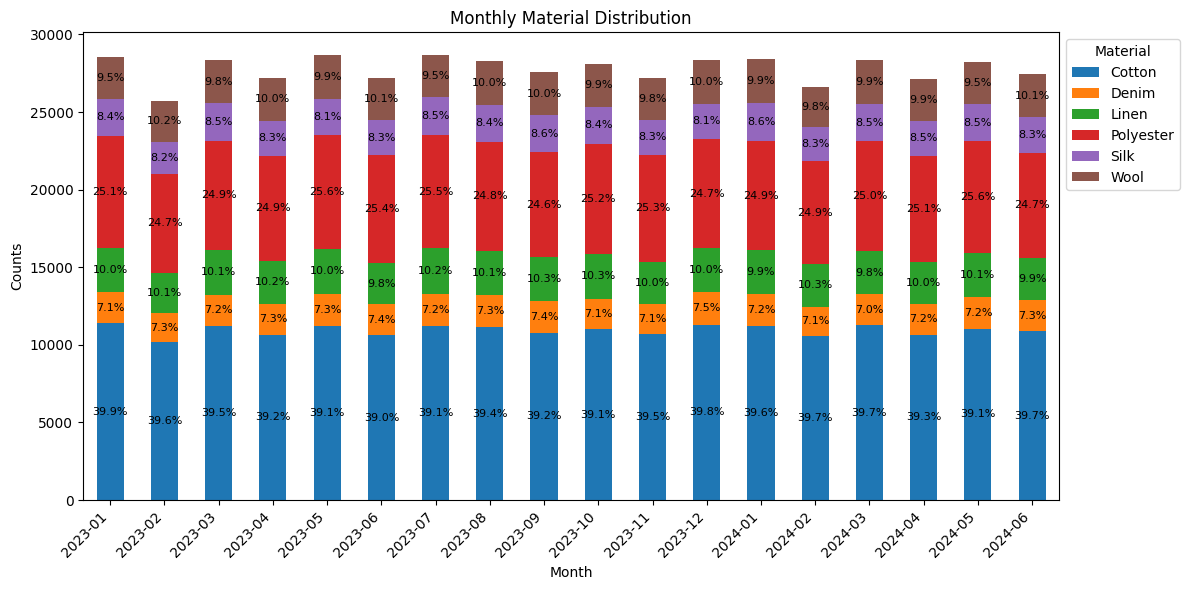

In [39]:
# Group by Month and Material, then calculate counts
monthly_material_distribution = density_report.groupby(['Month', 'Material']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_material_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Material Distribution')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Material', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, month in enumerate(monthly_material_distribution.index):
    total = monthly_material_distribution.loc[month].sum()
    bottom = 0
    for material in monthly_material_distribution.columns:
        value = monthly_material_distribution.loc[month, material]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8)
        bottom += value

plt.show()

##### Monthly Supplier Distribution

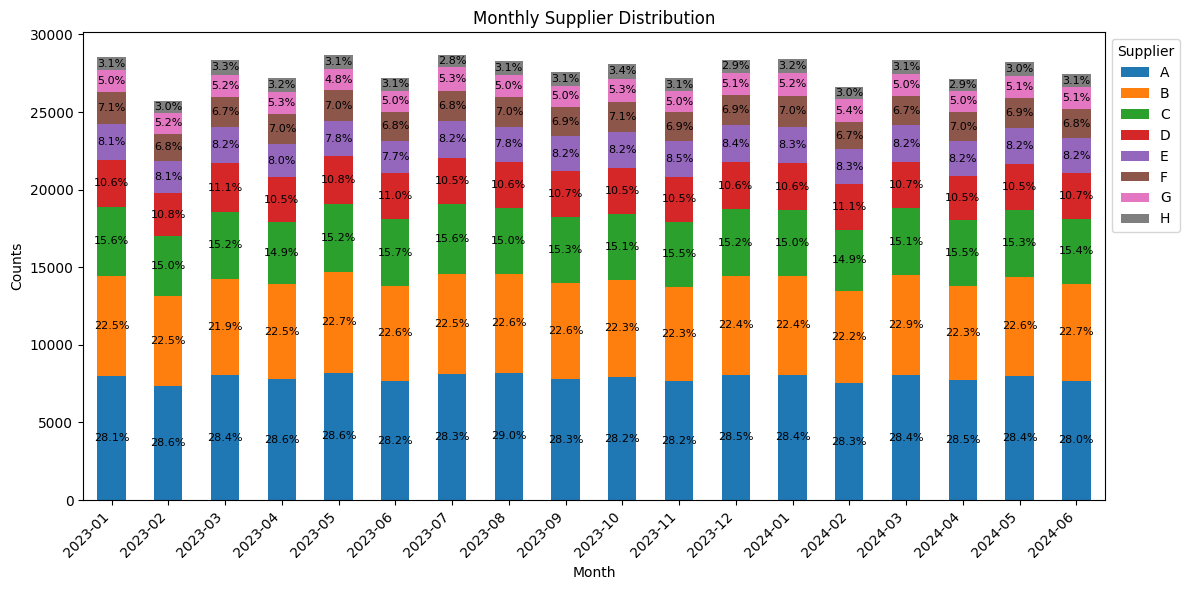

In [53]:
# Group by Month and SupplierName, then calculate counts
monthly_supplier_distribution = density_report.groupby(['Month', 'SupplierName']).size().unstack(fill_value=0)

# Plot the distribution
ax = monthly_supplier_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Supplier Distribution')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Supplier', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, month in enumerate(monthly_supplier_distribution.index):
    total = monthly_supplier_distribution.loc[month].sum()
    bottom = 0
    for supplier in monthly_supplier_distribution.columns:
        value = monthly_supplier_distribution.loc[month, supplier]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8)
        bottom += value

plt.show()

## Values Across Suppliers

##### Supplier Packaging Quality Distribution

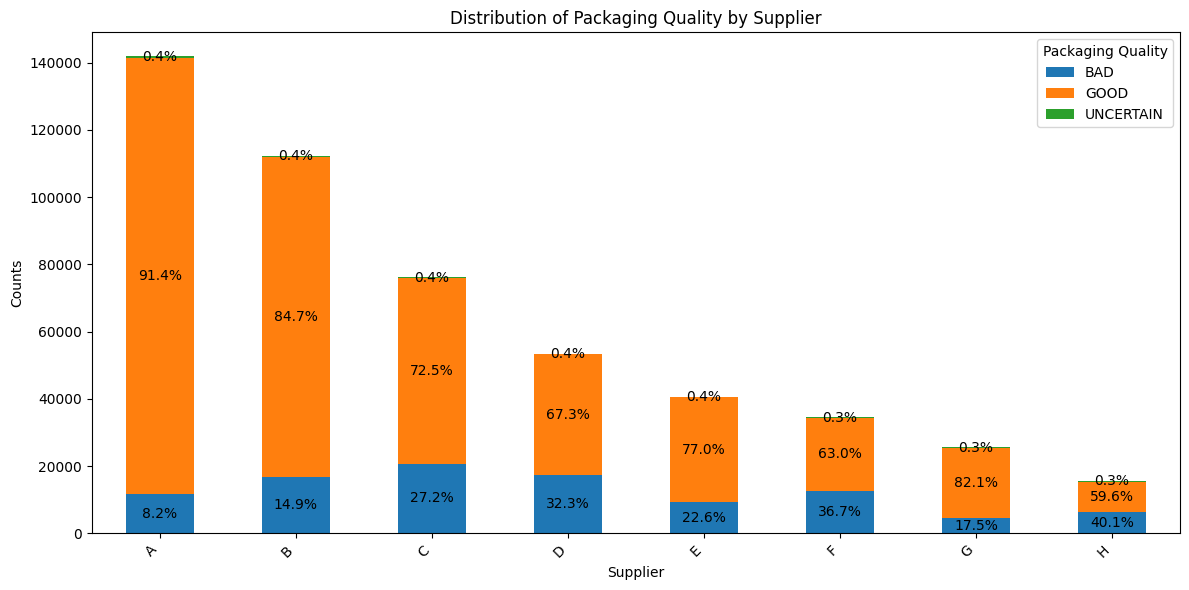

In [46]:
# Group by Supplier and Packaging Quality, then calculate counts
packaging_quality_by_supplier = density_report.groupby(['SupplierName', 'PackagingQuality']).size().unstack(fill_value=0)

# Plot the distribution
ax = packaging_quality_by_supplier.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Packaging Quality by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Quality', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, supplier in enumerate(packaging_quality_by_supplier.index):
    total = packaging_quality_by_supplier.loc[supplier].sum()
    bottom = 0
    for quality in packaging_quality_by_supplier.columns:
        value = packaging_quality_by_supplier.loc[supplier, quality]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.show()

##### Supplier Garmet Type Distribution

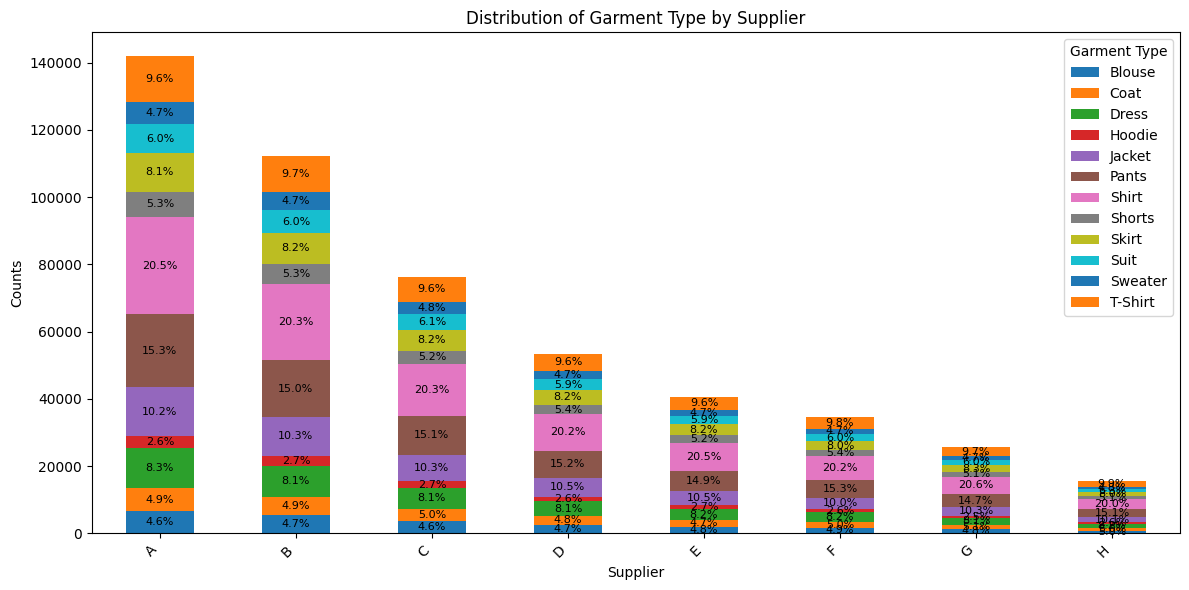

In [49]:
# Group by Supplier and GarmentType, then calculate counts
garment_type_by_supplier = density_report.groupby(['SupplierName', 'GarmentType']).size().unstack(fill_value=0)

# Plot the distribution
ax = garment_type_by_supplier.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Garment Type by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Garment Type', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, supplier in enumerate(garment_type_by_supplier.index):
    total = garment_type_by_supplier.loc[supplier].sum()
    bottom = 0
    for garment_type in garment_type_by_supplier.columns:
        value = garment_type_by_supplier.loc[supplier, garment_type]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8)
        bottom += value

plt.show()

##### Supplier Material Distribution

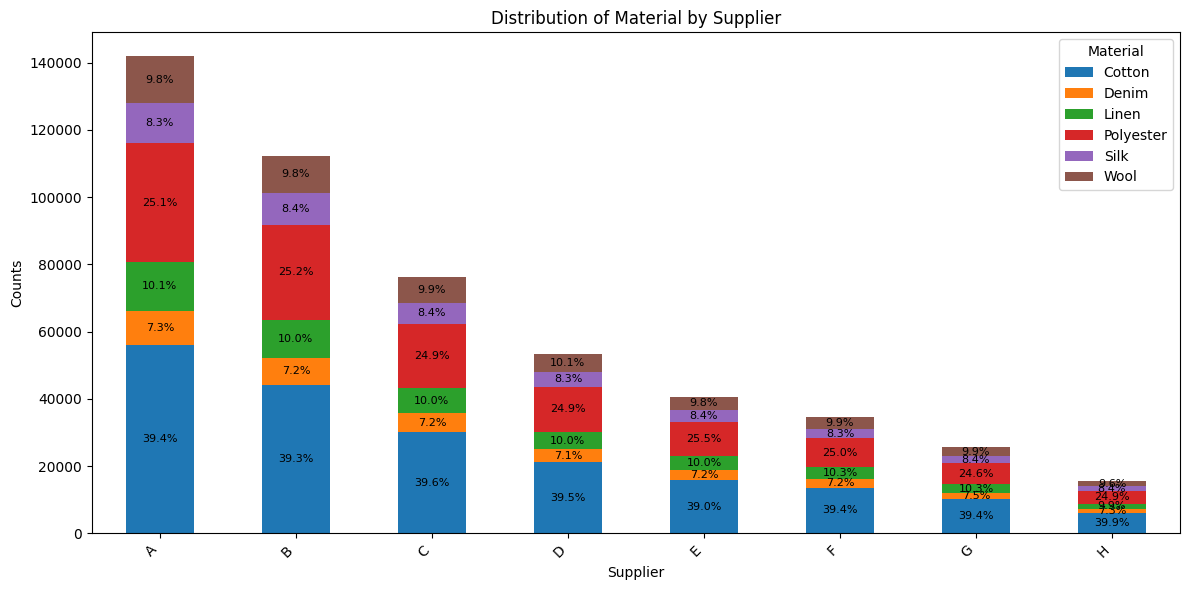

In [52]:
# Group by Supplier and Material, then calculate counts
material_by_supplier = density_report.groupby(['SupplierName', 'Material']).size().unstack(fill_value=0)

# Plot the distribution
ax = material_by_supplier.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Material by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Material', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Add percentage labels
for i, supplier in enumerate(material_by_supplier.index):
    total = material_by_supplier.loc[supplier].sum()
    bottom = 0
    for material in material_by_supplier.columns:
        value = material_by_supplier.loc[supplier, material]
        percentage = (value / total) * 100
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8)
        bottom += value

plt.show()